# Introduction to Image Processing

Mojdeh Rastgoo - Desire Sidibe

# 4. Spatial Filtering and de-noising

Importing the necessary libraries an modules.

In [38]:
%matplotlib inline
#%pprint off

# Matplotlib library
import matplotlib.pyplot as plt
from matplotlib import cm

# Numpy library
import numpy as np

from skimage import io 
from skimage import img_as_ubyte
from skimage import img_as_float
from skimage import color 

# import the function to add some noise
from skimage.util import random_noise
from skimage import transform
from skimage import feature
from skimage import morphology


## 4.1 Smoothing

### 4.1.1 Mean filter 
**Q.1** Smooth the lena image, by mean filter, using different disk circles with radius of $ r = 3, 5, 7$
show your results, remember to add title to your images. 

Use [`skimage.filters.rank.mean`](http://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean) and [`skimage.morphology.disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) function 

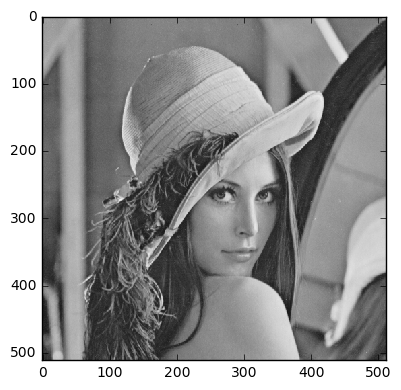

In [3]:
filename = './images/lena-grey.bmp'
lena = io.imread(filename)
lena_im = img_as_float(lena)
io.imshow(lena_im)

C:\Program Files\Anaconda2\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


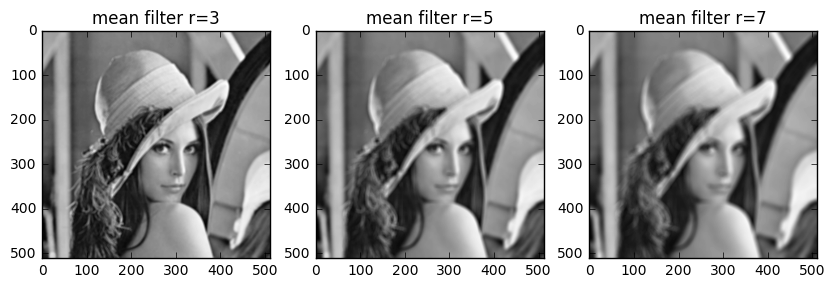

In [4]:
from skimage.morphology import disk
from skimage.filters.rank import mean
avg1 = mean(lena_im, disk(3))
avg2 = mean(lena_im, disk(5))
avg3 = mean(lena_im, disk(7))

fig, axes= plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
ax0, ax1, ax2, = axes.ravel()
ax0.imshow(avg1, cmap=cm.gray)
ax0.set_title('mean filter r=3')
ax1.imshow(avg2, cmap=cm.gray)
ax1.set_title('mean filter r=5')
ax2.imshow(avg3, cmap=cm.gray)
ax2.set_title('mean filter r=7')


### 4.1.2 Filtering using convolution 
**Q.2** Once again apply the mean fiter, howver instead of using `filters.rank` make your mean mask having the same size as the last filter you applied in the previous question (disk of 7) and use convolution to apply the filter. 

The function [`ndimage.filters.convolve`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.filters.convolve.html#scipy.ndimage.filters.convolve) from `scipy` allows to compute the convolution between a mask (filter) and an image.

In [5]:

from scipy import ndimage

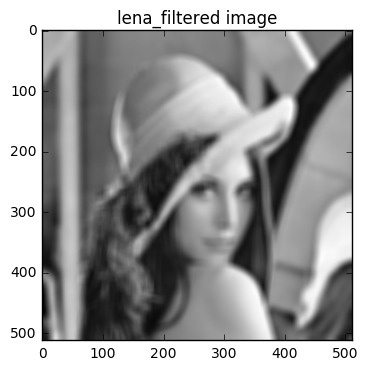

In [6]:
#Create the mean filter 
mask = np.ones((14,14),dtype=float)
#Normalise the mask 
mask_mean = mask/(14*14)
lena_filtered = ndimage.filters.convolve(lena_im,mask_mean)

#plt.imshow rescale the image between 
plt.imshow(lena_filtered,cmap=cm.gray)
plt.title('lena_filtered image')


Any filtering will work is a similar manner. Only the mask (filter) will change and will define the nature of the filtering.

## 4.2 Common spatial filtering

In this section, you will learn about spatial filters which are commonly used in image processing. These filters are already implemented in `skimage` and can be directly used without applying the previous processing.

check the modules `filters` and `filters.rank` for more information.

In [11]:
from skimage import filters


### 4.2.1 First-order edge detector

You already saw during the lecture the following edge detectors: (i) Roberts, (ii) Prewitt, and (iii) Sobel.
All these operators are an approximation of the first derivative. They are highly sensitive to noise even if Prewitt and Sobel have a smoothing process embedded.

Scharr opearator is an improved version of Sobel such that the operator provides a rotational symmetry.

The following functions are defined in `skimage`: `filters.roberts`, `filters.prewitt`, `filters.sobel`, and `filters.scharr`. 

**Q.3** Apply `roberts`, `prewitt`, `sobel` and `scharr` filters on Leaves image (`leaves.jpg`).

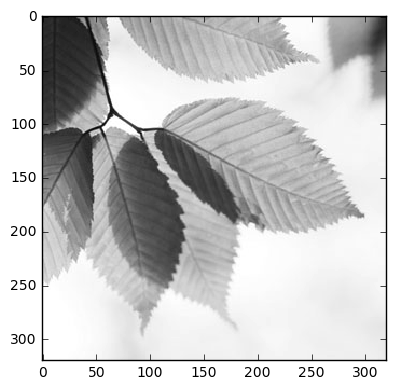

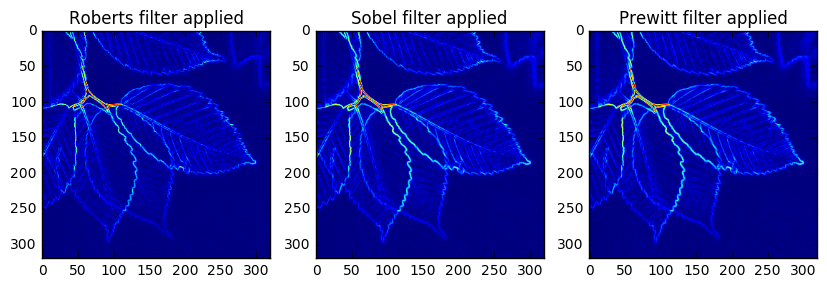

In [12]:
#Getting the data of the leaves image
leaves = io.imread('./images/leaves.jpg', as_grey= True)
#Changing the image as float
leaves_im = img_as_float(leaves)
#Displaying the leaves image
io.imshow(leaves_im)

#Applying the Robert filters on the leave image
Roberts_filt = filters.roberts(leaves_im)
#Applying the Sobel filter on the leave image
Sobel_filt = filters.sobel(leaves_im)
#Applying the Prewitt  filter on the leave image
Prewitt_filt = filters.prewitt(leaves_im)

fig, axes= plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
ax0, ax1, ax2, = axes.ravel()
ax0.set_title('Roberts filter applied')
ax0.imshow(Roberts_filt)
ax1.imshow(Sobel_filt)
ax1.set_title('Sobel filter applied')
ax2.imshow(Prewitt_filt)
ax2.set_title('Prewitt filter applied')

**Q.4** Implement sobel filters using convolution operation.
Reminder, sobels operators in horizontal and vertical are as follows.

$$S_x = \begin{bmatrix}1& 0 & -1\\ 2 & 0 & -2 \\ 1 & 0 & -1\end{bmatrix}, \qquad S_y = \begin{bmatrix}1& 2 & 1\\ 0 & 0 & 0 \\ -1 & -2 & -1\end{bmatrix}$$

and then show the magnitude and angle image obtained from the filter 

[[ 1.57079633  1.929567    2.03444394 ...,  2.62360951  2.57047878
   2.4546215 ]
 [ 1.57079633  1.57079633  1.68145355 ...,  2.07359601  2.02655829
   1.92010912]
 [ 1.57079633  1.16590454  1.57079633 ...,  1.87240531  1.82098506
   1.75584973]
 ..., 
 [ 0.          0.          0.         ...,  1.67521516  1.82762494
   1.69515132]
 [ 0.          0.          0.         ...,  1.55059907  1.5528427
   1.57079633]
 [ 0.          0.          0.         ...,  1.2013729   1.2013729
   1.57079633]]


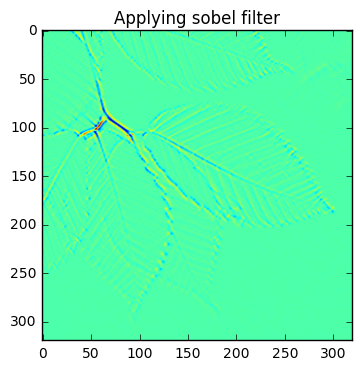

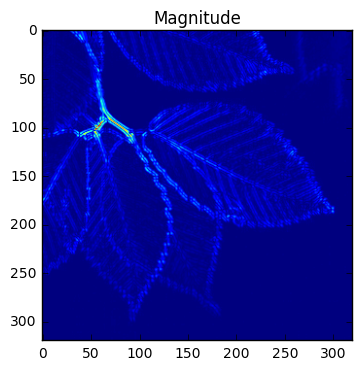

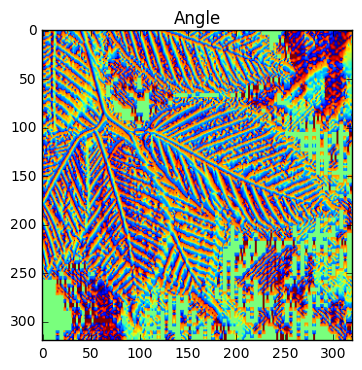

In [13]:
import math
S_x = np.array(([1, 0., -1],[ 2 ,0., -2 ],[1, 0., -1]),dtype=float)
S_y = np.array(([1 ,2, 1],[ 0, 0, 0],[ -1 ,-2, -1]),dtype=float)
leaves_1 = ndimage.filters.convolve(leaves_im,S_x)
leaves_2 = ndimage.filters.convolve(leaves_1,S_y)
plt.figure()
plt.imshow(leaves_2)
plt.title('Applying sobel filter')

#Getting the magnitude obtained from the filter
G = np.sqrt(leaves_1 *leaves_1  + leaves_2*leaves_2)
plt.figure()
plt.imshow(G)
plt.title('Magnitude')
#print(G)

#Getting the angle obtained from the filter
Angle = np.arctan2(leaves_2,leaves_1)
print(Angle)
plt.figure()
plt.imshow(Angle)
plt.title('Angle')


### 4.2.2 Second-order edge detector (Laplace filter)

The second order edge detector is using the Laplace kernel as seen in lectures.

The `skimage` toolbox does provides an implementation of this filter in `filters.laplace` modules. 

**Q.4** Apply this filter on the Leaves image.

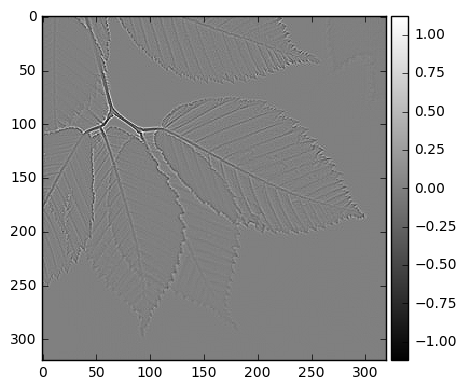

In [14]:
#Applying Laplacian filter 
Laplacian_filt = filters.laplace(leaves_im, ksize=3, mask=None)
#Displaying the image with Laplacian filter 
io.imshow(Laplacian_filt,cmap=cm.gray)


### 4.2.3 Angular edge detector (Gabor filter)

In the previous section, edges are detected using the response of two kernels (i.e., horizontal and vertical kernels) which are later combined (i.e., magnitude and angle). 

Gabor filters is a family of filters which are sensitive to a specific angle and a specific frequency.
Gabor filter is defined by a sinusoidal wave multiplied by a guassian, the complex form of this filter is presented bellow :

$$g(x,y;\lambda,\theta,\psi,\sigma,\gamma) = \exp\left(-\frac{x'^2+\gamma^2y'^2}{2\sigma^2}\right)\exp\left(i\left(2\pi\frac{x'}{\lambda}+\psi\right)\right)$$

where 
$$
{\displaystyle x'=x\cos \theta +y\sin \theta \,}$$
and
$$
{\displaystyle y'=-x\sin \theta +y\cos \theta \,} $$
`Skimage` provides an implementation of gabor filtering in [`filters.gabor`](http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.gabor)


**Q.5 **Apply this filter to find the edges at 60 degrees in Lena image. Try with different frequencies in the range [0.05, 0.5].

In [15]:
from skimage.filters import gabor
Gab = gabor(leaves_im, frequency=0.05, theta=0, bandwidth=1, sigma_x=None, sigma_y=None, n_stds=3, offset=0, mode='reflect', cval=0)
io.imshow(Gab)

AttributeError: 'tuple' object has no attribute 'dtype'

## 4.3 Denoising filters

Different filters can be applied in the spatial domain to remove the noise.
These filters can be found in the module `filters.rank`.

Before to start denoising the image, we need to generate some corrupted image using the noise generator from `skimage`.
For this purpose, we will use the function [`util.random_noise`](http://scikit-image.org/docs/dev/api/skimage.util.html#skimage.util.random_noise).

**Q.6 ** Generate several corrupted Lena images with `gaussian` noise, `salt & peppers` noise, and `speckle` noise. Keep the default parameters.

In [16]:
from skimage import util

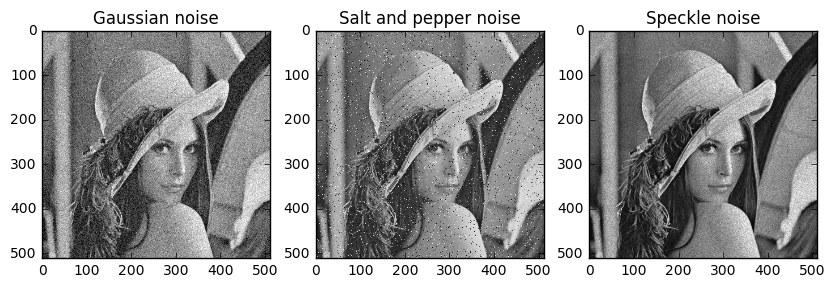

In [17]:
#Applying gaussian noise on lena image 
Gaussian_noise =random_noise(lena_im, mode='gaussian', seed=None, clip=True)
#Aplying speckle noise on lena image
Speckle_noise =random_noise(lena_im, mode='speckle', seed=None, clip=True)
#Aplying salt and peppernoise on lena image
Saltpepper_noise =random_noise(lena_im, mode='s&p', seed=None, clip=True)
#Plotting figures 
fig, axes= plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
ax0, ax1, ax2, = axes.ravel()
ax0.imshow(Gaussian_noise,cmap=cm.gray)
ax0.set_title('Gaussian noise')
ax1.imshow(Saltpepper_noise,cmap=cm.gray)
ax1.set_title('Salt and pepper noise')
ax2.imshow(Speckle_noise,cmap=cm.gray)
ax2.set_title('Speckle noise')


**Q.7** Apply `median`, `mean` and `alpha-trimmed` mean filter on different corrupted Lena images with the mask corresponding to disk 1 and 3.

 `alpha-trimmed` ([`mean_percentile`](http://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean_percentile)) mean filter works similar to normal mean filter. However, it considers only the grey values inside a specific range.

** Q.7.1 mean filter: **

In [15]:
#Applying a mean filter on the image of lena with gaussian noise
Gauss1 = mean(Gaussian_noise, disk(1))
Gauss3 = mean(Gaussian_noise, disk(3))

#Applying a mean filter on the image of lena with salt and pepper noise
S_P1 = mean(Saltpepper_noise, disk(1))
S_P3 = mean(Saltpepper_noise, disk(3))
#Applying a mean filter on the image of lena with speckle noise
Speckle1 = mean(Saltpepper_noise, disk(1))
Speckle3 = mean(Saltpepper_noise, disk(3))



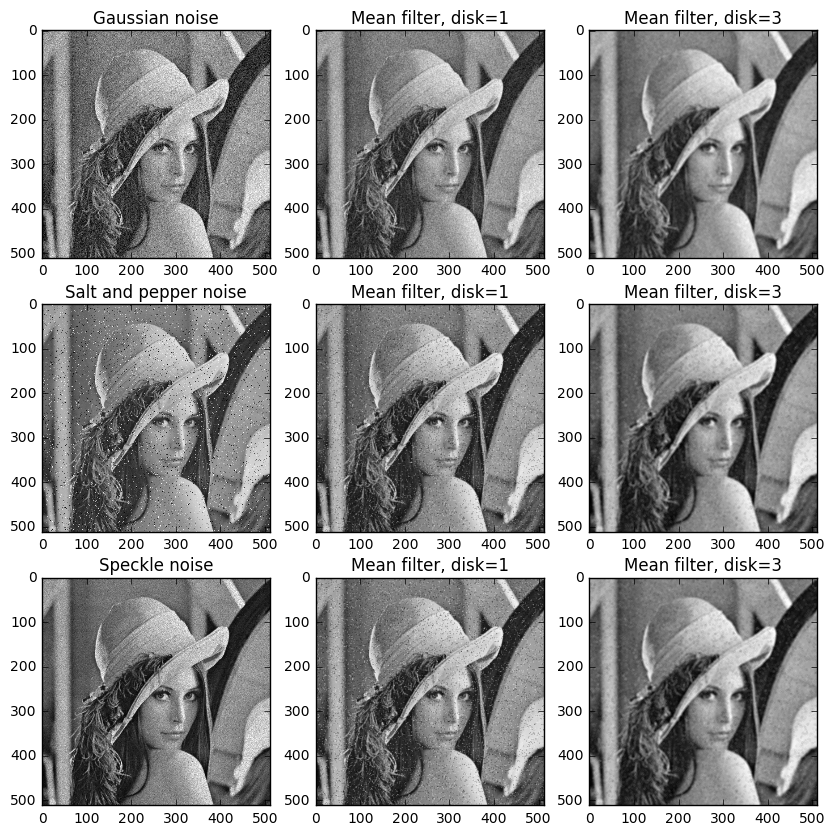

In [16]:
#Plotting figures 
fig, axes= plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
ax0, ax1, ax2,ax3, ax4, ax5,ax6, ax7, ax8, = axes.ravel()
ax0.imshow(Gaussian_noise,cmap=cm.gray)
ax0.set_title('Gaussian noise')
ax1.imshow(Gauss1,cmap=cm.gray)
ax1.set_title('Mean filter, disk=1')
ax2.imshow(Gauss3,cmap=cm.gray)
ax2.set_title('Mean filter, disk=3')
ax3.imshow(Saltpepper_noise,cmap=cm.gray)
ax3.set_title('Salt and pepper noise')
ax4.imshow(S_P1,cmap=cm.gray)
ax4.set_title('Mean filter, disk=1')
ax5.imshow(S_P3,cmap=cm.gray)
ax5.set_title('Mean filter, disk=3')
ax6.imshow(Speckle_noise,cmap=cm.gray)
ax6.set_title('Speckle noise')
ax7.imshow(Speckle1,cmap=cm.gray)
ax7.set_title('Mean filter, disk=1')
ax8.imshow(Speckle3,cmap=cm.gray)
ax8.set_title('Mean filter, disk=3')


** Q.7.2 alpha-trimmed mean filter: **

Apply this function on the different corrupted Lena by considering the gray value in the range [0.05, 0.95].

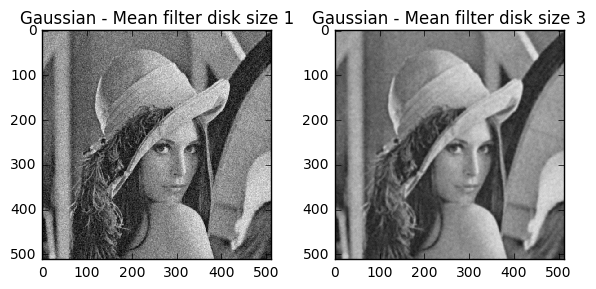

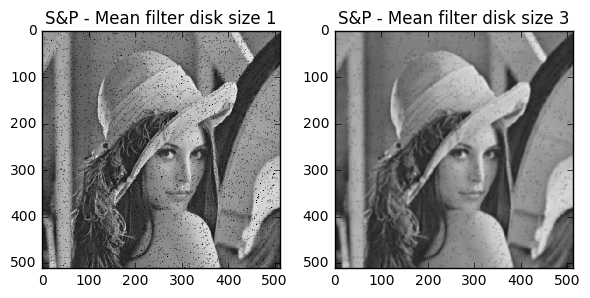

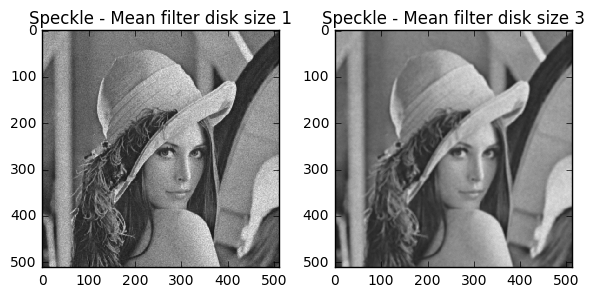

In [22]:
from skimage import morphology
#Gaussian noise
lena_gaussian_mean_percentile1 = filters.rank.mean_percentile(Gaussian_noise, morphology.disk(1), p0=0.05, p1=0.95)
lena_gaussian_mean_percentile3 = filters.rank.mean_percentile(Gaussian_noise, morphology.disk(3), p0=0.05, p1=0.95)

plt.figure()
plt.subplot(121)
plt.title('Gaussian - Mean filter disk size 1')
io.imshow(lena_gaussian_mean_percentile1)
plt.subplot(122)
plt.title('Gaussian - Mean filter disk size 3')
io.imshow(lena_gaussian_mean_percentile3)

#Salt and pepper noise
lena_sp_mean_percentile1 = filters.rank.mean_percentile(Saltpepper_noise, morphology.disk(1), p0=0.05, p1=0.95)
lena_sp_mean_percentile3 = filters.rank.mean_percentile(Saltpepper_noise, morphology.disk(3), p0=0.05, p1=0.95)

plt.figure()
plt.subplot(121)
plt.title('S&P - Mean filter disk size 1')
io.imshow(lena_sp_mean_percentile1)
plt.subplot(122)
plt.title('S&P - Mean filter disk size 3')
io.imshow(lena_sp_mean_percentile3)

#Speckle noise
lena_speckle_mean_percentile1 = filters.rank.mean_percentile(Speckle_noise, morphology.disk(1), p0=0.05, p1=0.95)
lena_speckle_mean_percentile3 = filters.rank.mean_percentile(Speckle_noise, morphology.disk(3), p0=0.05, p1=0.95)

plt.figure()
plt.subplot(121)
plt.title('Speckle - Mean filter disk size 1')
io.imshow(lena_speckle_mean_percentile1)
plt.subplot(122)
plt.title('Speckle - Mean filter disk size 3')
io.imshow(lena_speckle_mean_percentile3)


** Q.7.3 median filter: **

In [19]:
 from skimage.filters.rank import median

In [20]:
#Applying a median filter on the image of lena with gaussian noise
Gauss_median1 = median(Gaussian_noise, disk(1))
Gauss_median3 = median(Gaussian_noise, disk(3))

#Applying a median filter on the image of lena with salt and pepper noise
S_P_median1 = mean(Saltpepper_noise, disk(1))
S_P_median3 = mean(Saltpepper_noise, disk(3))
#Applying a median filter on the image of lena with speckle noise
Speckle_median1 = mean(Saltpepper_noise, disk(1))
Speckle_median3 = mean(Saltpepper_noise, disk(3))


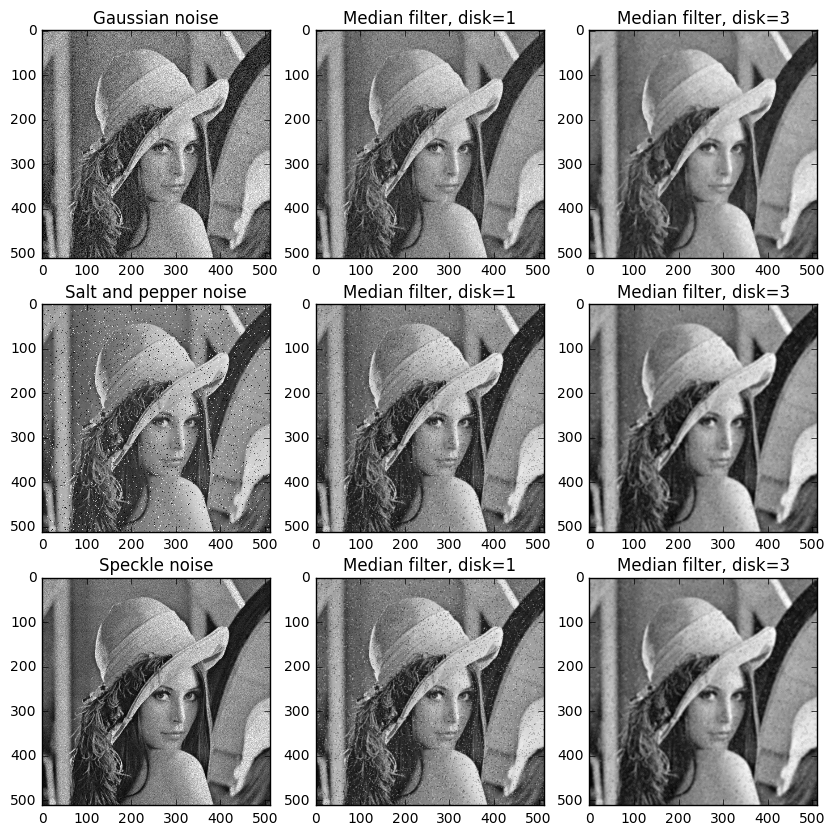

In [21]:
#Plotting figures 
fig, axes= plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
ax0, ax1, ax2,ax3, ax4, ax5,ax6, ax7, ax8, = axes.ravel()
ax0.imshow(Gaussian_noise,cmap=cm.gray)
ax0.set_title('Gaussian noise')
ax1.imshow(Gauss_median1,cmap=cm.gray)
ax1.set_title('Median filter, disk=1')
ax2.imshow(Gauss_median3,cmap=cm.gray)
ax2.set_title('Median filter, disk=3')
ax3.imshow(Saltpepper_noise,cmap=cm.gray)
ax3.set_title('Salt and pepper noise')
ax4.imshow(S_P_median1,cmap=cm.gray)
ax4.set_title('Median filter, disk=1')
ax5.imshow(S_P_median3,cmap=cm.gray)
ax5.set_title('Median filter, disk=3')
ax6.imshow(Speckle_noise,cmap=cm.gray)
ax6.set_title('Speckle noise')
ax7.imshow(Speckle_median1,cmap=cm.gray)
ax7.set_title('Median filter, disk=1')
ax8.imshow(Speckle_median3,cmap=cm.gray)
ax8.set_title('Median filter, disk=3')


## 4.4 Sharpening

**Q.8** Use the `railway` image and sharpen the image using laplacian fitering.

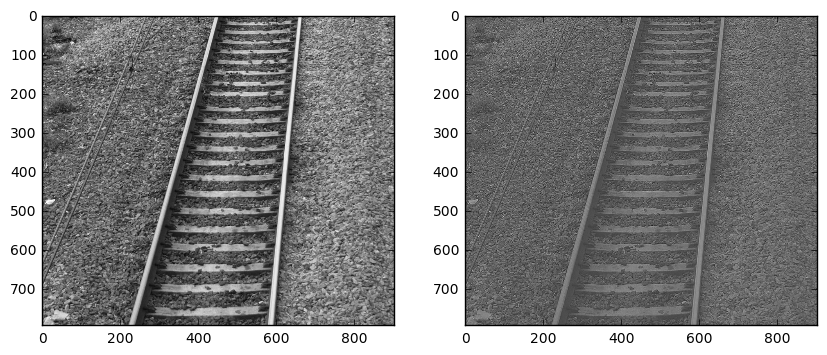

In [24]:
#Getting the data of the railway image
railway = io.imread('./images/railway.jpg', as_grey= True)
#Changing the image as float
railway_im = img_as_float(railway)
#Applying Laplacian filter 
railway_Laplacian = filters.laplace(railway_im, ksize=3, mask=None)
railway_Laplacian = railway + railway_Laplacian
fig, axes= plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
ax0, ax1 = axes.ravel()
#Displaying the leaves image
ax0.imshow(railway_im,cmap=cm.gray)
#Displaying the image with Laplacian filter 
ax1.imshow(railway_Laplacian,cmap=cm.gray)


## 4.5 Hough transform

** Q.9 ** Define your Hough_trans function which finds the lines within an image

you can use either `hough_line` and `hough_line_peaks` or `probabilistic_hough_line` from [`skimage.transform`](http://scikit-image.org/docs/dev/api/skimage.transform.html). 

search a bit to know the difference between `probablistic_hough_line` and `hough_line`

Or `HoughLines` and `HoughLinesP` from [`cv2`](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html)


Test your function on `railway` and `building` images. 

**Note : use `skimage.feature.canny` or `cv2.canny` edge detector to find the primary edges**

In [25]:
from skimage.transform import hough_line,hough_line_peaks

In [26]:
def Hough_trans(input_im):
    
    edges = feature.canny(input_im, 4)    
    lines = transform.probabilistic_hough_line(edges, line_length=5, line_gap=3)
    
    plt.figure()
    io.imshow(input_im)
    plt.title('Detected lines')
    
    for i in range(0, len(lines)-1):
        x1 = lines[i][0][0]
        y1 = lines[i][0][1]
        x2 = lines[i][1][0]
        y2 = lines[i][1][1]
        plt.plot([x1, x2], [y1, y2], '-b')
        
    plt.show()
    
    return lines


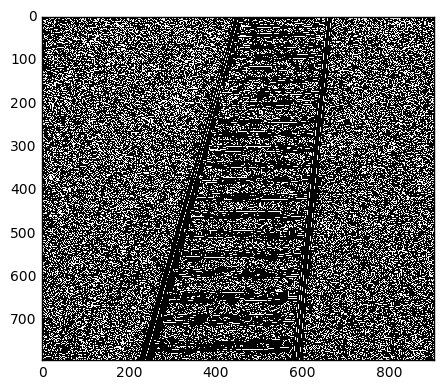

In [29]:
from skimage.feature import canny
from skimage import feature
#finding the primary edges
edge1 = canny(railway_im, sigma=1.0, low_threshold=None, high_threshold=None, mask=None, use_quantiles=False) 
io.imshow(edge1)

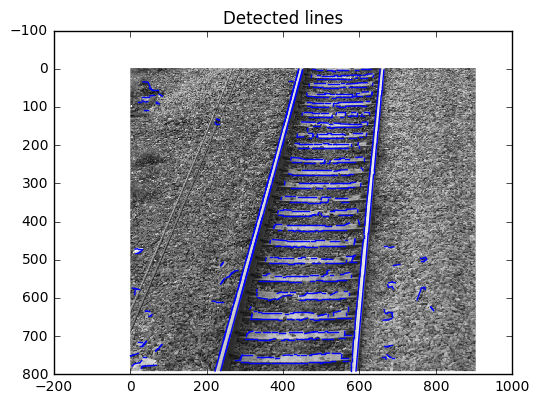

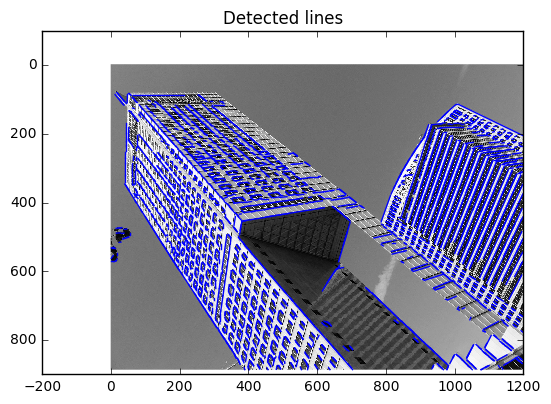

AttributeError: 'list' object has no attribute 'dtype'

In [41]:

railway_ht = Hough_trans(railway_im)

building= io.imread('./images/building.jpg', as_grey=True)
building_im = img_as_float(building)
building_ht = Hough_trans(building_im)
io.imshow(building_ht)